<a href="https://colab.research.google.com/github/nalrob/Datos_Masivos_MCD/blob/main/Tarea_1_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Cargar el archivo CSV
ds = pd.read_csv('/content/Reddit_Data.csv')
data = ds[['clean_comment']]
data.head()

,clean_comment
0,family mormon have never tried explain them t...
1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...


In [ ]:
data.shape

(500, 1)

In [ ]:
from textblob import TextBlob
import pandas as pd

# Crear las listas para las nuevas columnas
comments = []
sentiments = []

# Iterar sobre cada línea (comentario) en el archivo CSV
for comment in data['clean_comment']:
    if isinstance(comment, float):
        sentiments.append("NaN")  # Opción: asignar un valor predeterminado para los valores float
        continue

    # Analizar el sentimiento del comentario
    blob = TextBlob(comment)
    sentiment = blob.sentiment.polarity

    # Asignar una etiqueta de sentimiento basada en el puntaje de sentimiento
    if sentiment > 0:
        sentiments.append("Positivo")
    elif sentiment < 0:
        sentiments.append("Negativo")
    else:
        sentiments.append("Neutral")

# Crear el DataFrame con las columnas 'clean_comment' y 'sentimiento'
df = pd.DataFrame({'clean_comment': data['clean_comment'], 'sentimiento': sentiments})

# Imprimir la tabla resultante
print(df.head())


                                       clean_comment sentimiento
0   family mormon have never tried explain them t...    Positivo
1  buddhism has very much lot compatible with chr...    Positivo
2  seriously don say thing first all they won get...    Negativo
3  what you have learned yours and only yours wha...     Neutral
4  for your own benefit you may want read living ...    Positivo


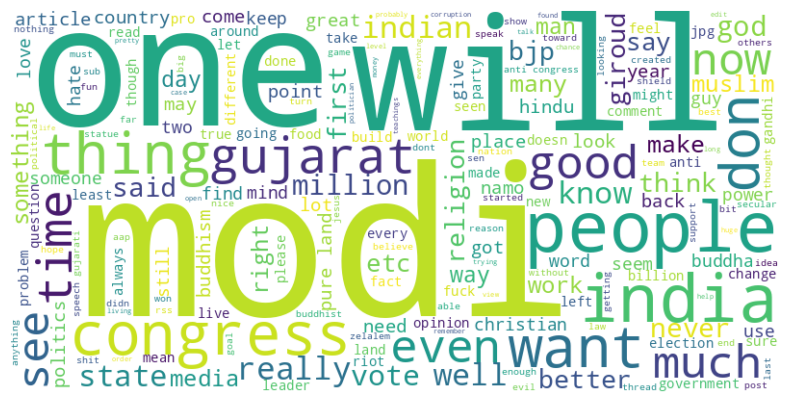

In [ ]:
from wordcloud import WordCloud
texto = ' '.join(data['clean_comment'].tolist())

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Mostrar el gráfico de Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from textblob import TextBlob
import pandas as pd

# Crear las listas para las nuevas columnas
comments = []
sentiments = []

# Iterar sobre cada línea (comentario) en el archivo CSV
for comment in data['clean_comment']:
    if isinstance(comment, float):
        sentiments.append("NaN")  # Opción: asignar un valor predeterminado para los valores float
        continue

    # Analizar el sentimiento del comentario
    blob = TextBlob(comment)
    sentiment = blob.sentiment.polarity

    # Asignar una etiqueta de sentimiento basada en el puntaje de sentimiento
    if sentiment > 0:
        sentiments.append("Positivo")
    elif sentiment < 0:
        sentiments.append("Negativo")
    else:
        sentiments.append("Neutral")

# Crear el DataFrame con las columnas 'clean_comment' y 'sentimiento'
df = pd.DataFrame({'clean_comment': data['clean_comment'], 'sentimiento': sentiments})

# Imprimir la tabla resultante
print(df.head())

                                       clean_comment sentimiento
0   family mormon have never tried explain them t...    Positivo
1  buddhism has very much lot compatible with chr...    Positivo
2  seriously don say thing first all they won get...    Negativo
3  what you have learned yours and only yours wha...     Neutral
4  for your own benefit you may want read living ...    Positivo


In [ ]:
# Eliminar filas con valores nulos en la columna 'sentimiento'
df = df.dropna(subset=['sentimiento'])

# Verificar los resultados
print(df)


                                         clean_comment sentimiento
0     family mormon have never tried explain them t...    Positivo
1    buddhism has very much lot compatible with chr...    Positivo
2    seriously don say thing first all they won get...    Negativo
3    what you have learned yours and only yours wha...     Neutral
4    for your own benefit you may want read living ...    Positivo
..                                                 ...         ...
495  the literal meaning the sanskrit word “namah ः...     Neutral
496                team gave him clean chit the riots     Positivo
497   dont give shit about 2002 riots want future s...    Positivo
498                       congresshighcommand leaking      Neutral
499   thhe allegations are true why modi not jail h...    Positivo

[500 rows x 2 columns]


In [ ]:
# Definir el diccionario de reemplazo
mapping = {'Positivo': 1, 'Negativo': -1, 'Neutral': 0}

# Aplicar el reemplazo en la columna "sentimiento"
df['sentimiento'] = df['sentimiento'].replace(mapping)
print(df.sentimiento)

0      1
1      1
2     -1
3      0
4      1
      ..
495    0
496    1
497    1
498    0
499    1
Name: sentimiento, Length: 500, dtype: int64


In [ ]:
dist=list(df.sentimiento)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)

[106, 137, 257]


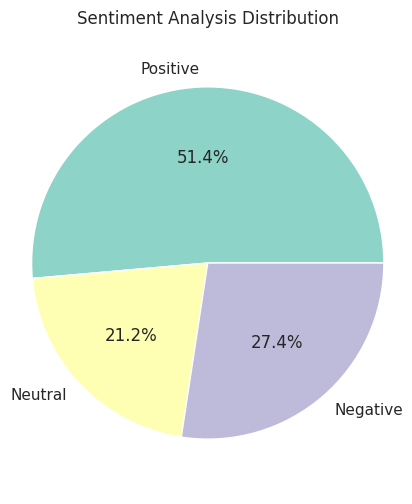

In [ ]:
import seaborn as sns
from collections import Counter

data = df['sentimiento']

# Contar los valores
value_counts = Counter(data)
labels = ['Positive', 'Neutral', 'Negative']
counts = list(value_counts.values())

# Generar el gráfico de pastel con seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(5, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.axis('equal')
plt.title('Sentiment Analysis Distribution')

plt.show()


In [ ]:
comment=list(df.clean_comment.astype(str))
sentiment=list(df.sentimiento)
reddit_dict=dict(zip(comment,sentiment))

In [ ]:
df_filtered = df[df['sentimiento'].isin([-1, 0, 1])]
Y=df_filtered['sentimiento'].values

In [ ]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in reddit_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i)

In [ ]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

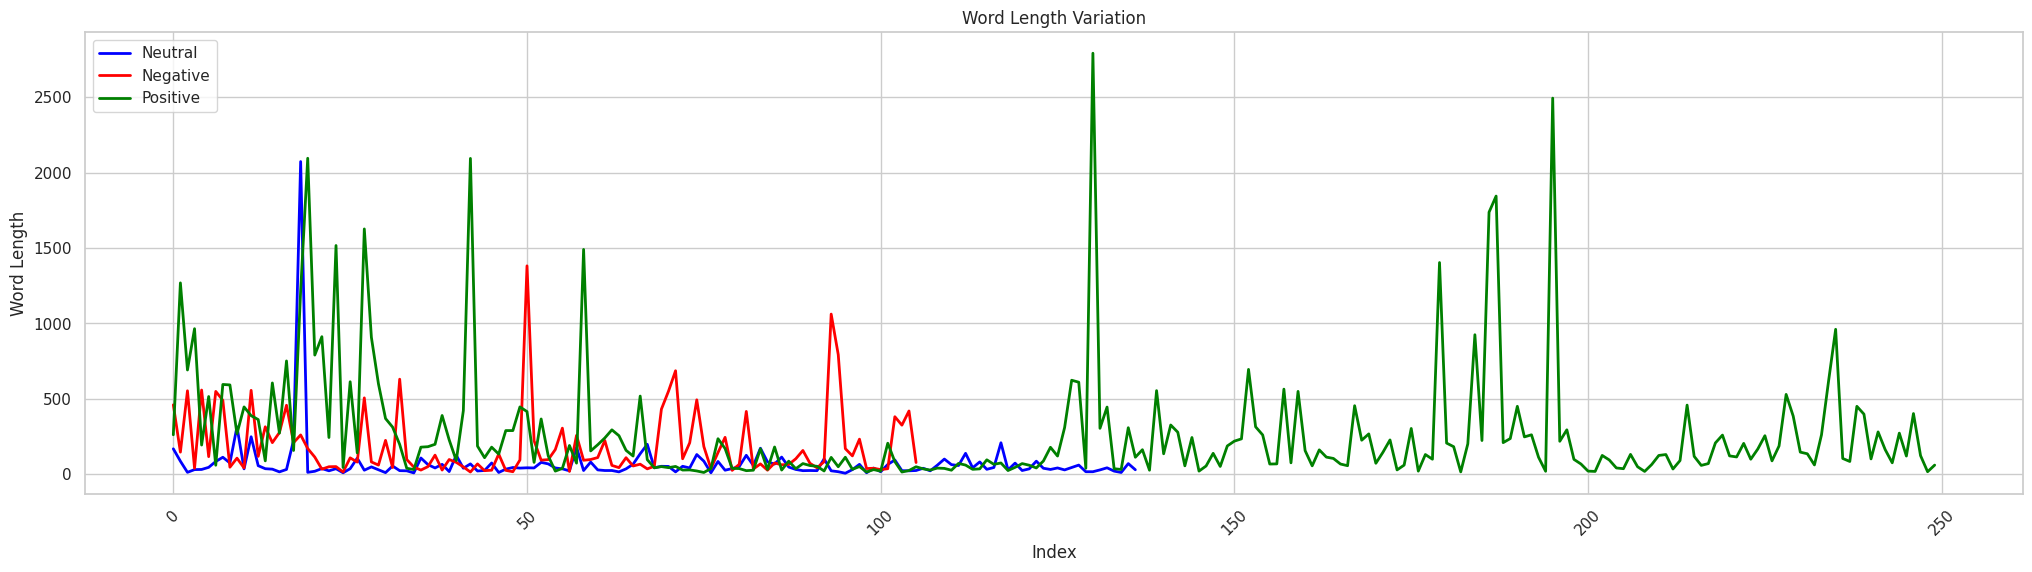

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.set_title("Word Length Variation")
ax.plot(Neutral_len[:250], c='blue', label='Neutral', linestyle='-', linewidth=2)
ax.plot(neg_len[:250], c='red', label='Negative', linestyle='-', linewidth=2)
ax.plot(pos_len[:250], c='green', label='Positive', linestyle='-', linewidth=2)
ax.legend(loc='upper left')

# Etiquetas de los ejes
ax.set_xlabel('Index')
ax.set_ylabel('Word Length')

# Rotación de las etiquetas del eje x
plt.xticks(rotation=45)

plt.show()


Tokenizer

In [ ]:
X=df['clean_comment'].astype('str')

lp=""
for i in X:
    lp+=i+" "


st=lp.split(' ')
dict_len=len(set(st))


dict_len,len(st)

(4276, 16730)

In [ ]:
tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
tokenizer.fit_on_texts(X)

In [ ]:
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=175,padding='post',truncating='post')

Encode The Sentiment Values

In [ ]:
df['sentimiento']=df['sentimiento'].replace({-1:2})

mp={0:"Neutral",1:"Positive",2:"Negative"}

In [ ]:
Y_hot= to_categorical(Y)

In [ ]:
# Codificar los datos de salida
Y_hot = to_categorical(Y, num_classes=3)

The model

In [ ]:
model=Sequential()
model.add(Embedding(dict_len,64,input_length=175))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(175,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(350,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(700)))
model.add(Dense(3,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 175, 64)           273664    
                                                                 
 dropout (Dropout)           (None, 175, 64)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 175, 350)         336000    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 175, 350)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 175, 700)         1962800   
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 175, 700)          0

In [ ]:
%%time

model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
hist=model.fit(X_train_padded,Y_hot,epochs=3,validation_split=0.2)

Epoch 1/3
13/13 [==============================] - 209s 15s/step - loss: 1.1095 - accuracy: 0.5050 - val_loss: 1.0288 - val_accuracy: 0.4500
Epoch 2/3
13/13 [==============================] - 189s 15s/step - loss: 0.9880 - accuracy: 0.5350 - val_loss: 0.9051 - val_accuracy: 0.5800
Epoch 3/3
13/13 [==============================] - 188s 15s/step - loss: 0.9257 - accuracy: 0.5500 - val_loss: 0.9069 - val_accuracy: 0.6200
CPU times: user 15min 55s, sys: 10.1 s, total: 16min 5s
Wall time: 10min 33s


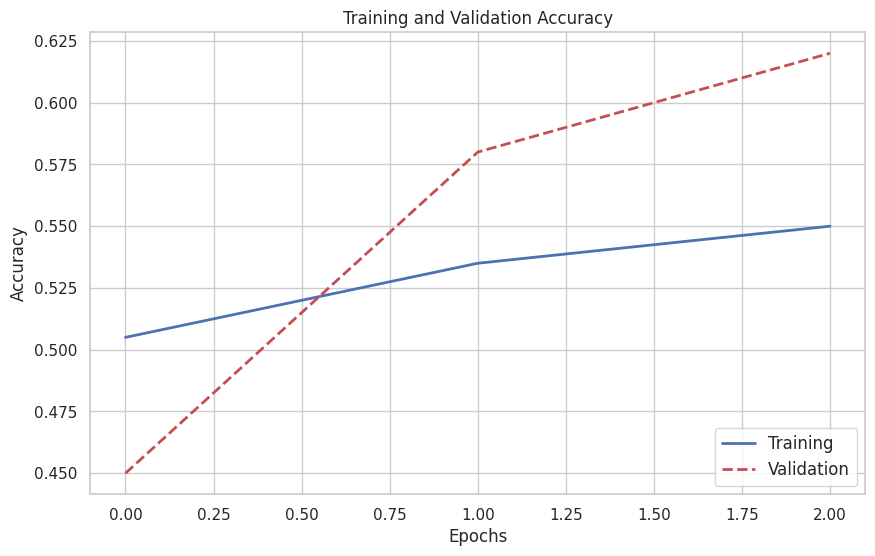

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.plot(hist.history['accuracy'], c='b', label='Training', linestyle='-', linewidth=2)
plt.plot(hist.history['val_accuracy'], c='r', label='Validation', linestyle='--', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Ajustar la leyenda
plt.legend(loc='lower right', fontsize='medium')

# Mostrar el gráfico
plt.show()


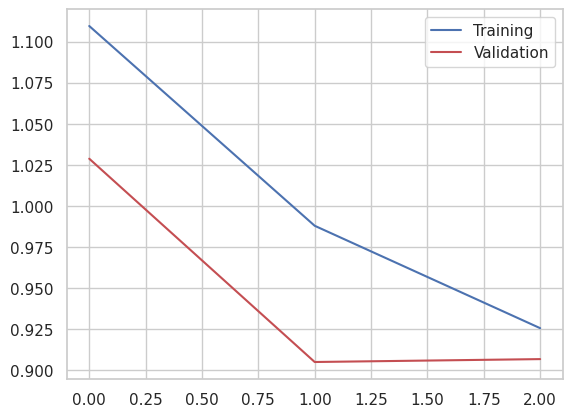

In [ ]:
plt.plot(hist.history['loss'],c='b',label='Training')
plt.plot(hist.history['val_loss'],c='r',label='Validation')
plt.legend(loc='upper right')
plt.show()

Prediction

In [ ]:
def predict(s):
    X_tes = []
    X_tes.append(s)
    X_test = tokenizer.texts_to_sequences(X_tes)
    X_test_padded = pad_sequences(X_test, maxlen=175, padding='post', truncating='post')
    predictions = model.predict(X_test_padded)
    sentiment = int(np.argmax(predictions[0]))
    print("The Predicted Sentiment is", mp[sentiment])


In [ ]:
ppp="Loving how me and my lovely partner is talking about what we want"
predict(ppp)

1/1 [==============================] - 3s 3s/step
The Predicted Sentiment is Positive


In [ ]:
lop="My depression will not let me work out"
predict(lop)

1/1 [==============================] - 1s 555ms/step
The Predicted Sentiment is Positive


In [ ]:
cod="It’s the little things that make me smile. Got our new car today and this arrived with it"
predict(cod)

1/1 [==============================] - 1s 542ms/step
The Predicted Sentiment is Positive


In [ ]:
br="I am officially done with @kanyewest'"
predict(br)

1/1 [==============================] - 1s 694ms/step
The Predicted Sentiment is Neutral


In [ ]:
loss, accuracy = model.evaluate(X_train_padded, Y_hot)
print("Loss:", loss)
print("Accuracy:", accuracy)


16/16 [==============================] - 55s 3s/step - loss: 0.7723 - accuracy: 0.6780
Loss: 0.7722583413124084
Accuracy: 0.6779999732971191


In [ ]:
from sklearn.metrics import accuracy_score

# Después de entrenar el modelo
y_pred = model.predict(X_train_padded)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Calcular la precisión
accuracy = accuracy_score(Y, y_pred_classes)

print("Accuracy:", accuracy)


16/16 [==============================] - 60s 3s/step
Accuracy: 0.652
